# Welcome to the Population Turnover Lab!

#### **Purpose:**
Teach students how population dynamics works and expose students to real populational situations.

#### **Outcome:**
Students will understand how to analyze population graphs and will be able to explain how different models explain population growth.


#### **Instructions:**
The first thing that you will need to do for this lab is to run the code block below. Move your mouse over the cell, a play button should appear in the top left corner of the cell, which you click. It may take a second to run, but be patient! Once it is done you will see a green check mark appear on the left of the cell. Scroll down to the next section after this is done.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def growth():
  indices = np.linspace(0, 100, num = 201)
  carrying_capacity = np.ones(201) * 6000
  exp_growth = indices * indices
  log_growth = np.ones(201) * (6000/ (1 + np.exp(-.1 * (indices - 33.673))))

  plt.plot(indices, carrying_capacity)
  plt.plot(indices, exp_growth)
  plt.plot(indices, log_growth)
  plt.legend(('a', 'b', 'c'))
  plt.show()

def load_dataset():
  wolf_data = pd.read_csv("https://raw.githubusercontent.com/bdhayes01/Bioinformatics_Capstone/main/data/yellowstone_wolves.csv")
  wolf_years = list(wolf_data['year'])
  wolf_pop = list(wolf_data['wolves'])
  wolf_pack = list(wolf_data['packs'])
  return wolf_years, wolf_pop, wolf_pack

def load_full_dataset():
  data = pd.read_csv("https://raw.githubusercontent.com/bdhayes01/Bioinformatics_Capstone/main/data/Wolves%20and%20Elk%20Yellowstone.csv")
  year = pd.to_numeric(data['year'])
  # elk =  pd.to_numeric(data['elk'].fillna(method="ffill").str.replace(',', '')) # This fills the missing elk values with the previously valid value.
  elk =  pd.to_numeric(data['elk'].interpolate().str.replace(',', '')) # This fills the missing elk values with the previously valid value.
  wolves = pd.to_numeric(data['wolves'].fillna(0))
  notes = data['notes']
  return year, elk, wolves, notes

def graph_data_2():
  year, elk, wolves, notes = load_full_dataset()
  x_ticks = np.arange(min(year), max(year), step=2)

  plt.plot(year, elk)
  plt.xticks(x_ticks)
  plt.ylabel("Number of Elk")
  plt.xlabel("Year")
  plt.title("Yellowstone Elk Population by Year")
  plt.show()

  plt.plot(year, wolves)
  plt.xticks(x_ticks)
  plt.ylabel("Number of Wolves")
  plt.xlabel("Year")
  plt.title("Yellowstone Wolf Population by Year")
  plt.show()

def graph_data():
  x, pop, pack = load_dataset()
  x = [1992, 1993, 1994] + x
  pop = [0, 0, 0] + pop
  plt.plot(x, pop)
  # plt.plot(x, pack)
  # plt.legend(('Wolves'))
  plt.ylabel("Number of Wolves")
  plt.xlabel("Year")
  plt.title("Yellowstone Wolves")
  plt.show()

def old_yellowstone_data():
  data = pd.read_csv("https://raw.githubusercontent.com/bdhayes01/Bioinformatics_Capstone/main/data/More_Yellowstone_Data.csv")
  year = pd.to_numeric(data['Year'])
  elk =  pd.to_numeric(data['Elk'].interpolate()) # This fills the missing elk values with the previously valid value.
  wolves = pd.to_numeric(data['Wolves'].fillna(0))
  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.set_xlabel('Year')
  ax1.set_ylabel('Elk Population', color=color)
  ax1.plot(year, elk, color=color, linestyle='--')
  ax1.set_ylim((-1000, 20000))

  ax2 = ax1.twinx()

  color = 'tab:blue'
  ax2.set_ylabel('Wolf Population', color=color)
  ax2.plot(year, wolves, color=color, linestyle='dotted')
  fig.tight_layout()
  plt.show()


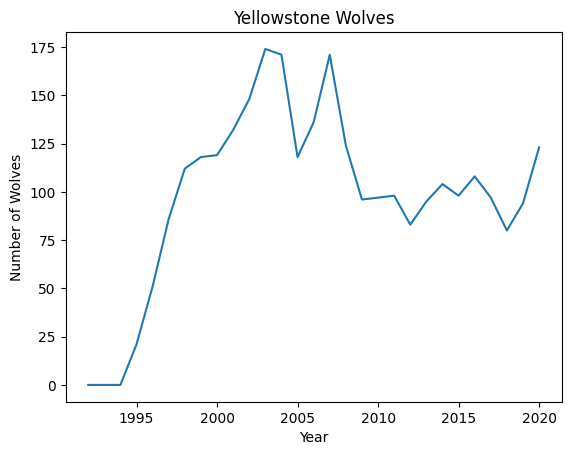

In [ ]:
graph_data()

In [ ]:
old_yellowstone_data()

# Activity 1: Learn
The purpose of this activity is to learn a little bit more about population turnover.

Step 1: Read the following articles:

[Population Growth and Carrying Capacity](https://www.khanacademy.org/science/hs-biology/x4c673362230887ef:matter-and-energy-in-ecosystems/x4c673362230887ef:population-growth-and-carrying-capacity/a/population-growth-and-carrying-capacity-article)

[Exponential and logistic growth](https://www.khanacademy.org/science/ap-biology/ecology-ap/population-ecology-ap/a/exponential-logistic-growth)

Step 2: Run the cell below by pressing the play button, as you did with the cell above.

Step 3: Answer the following questions associated with the articles by inputting your answer in between the quotes:

Ex. If I wanted to put 'c' as my answer for question two, I would change

my_answer_2 = "Insert answer here"

to

my_answer_2 = "c"



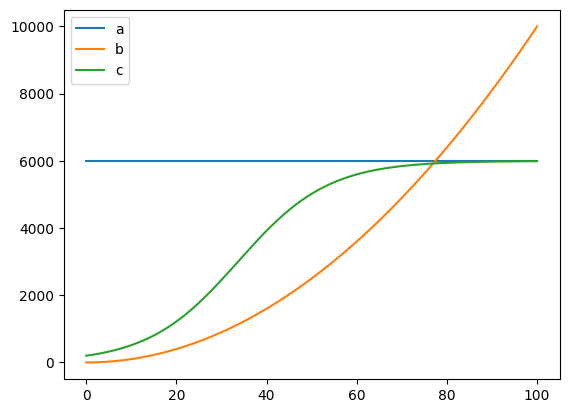

In [ ]:
growth()

#### **Question 1:**
Which line represents exponential growth? (The options are given in map legend, the blue line would be 'a', the orange is 'b', and so on.)

#### **Question 2:**
Which line represents logarithmic growth?

#### **Question 3:**
What do you think the carrying capacity is for this environment? Simply replace the number with your estimate, with no quotation marks. Any answer within 500 of the correct carrying capacity will do.


In [ ]:
my_answer_1 = "b"
my_answer_2 = "c"
my_answer_3 = 6000

# Activity 2: Experiment

After pressing play on the code block, you will see a graph with the 'wolves of yellowstone' modeled.

The different 'variables'(like elk = 1000) above the 'function call' (the one that says yellowstone) are able to be edited by changing the value to the right of the equals sign. Play around with this part to see how changes in wolf diet and other variables affect the graph! Then answer the questions below.

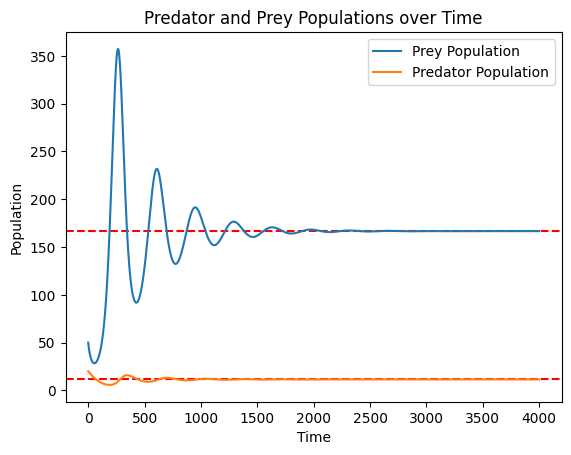

In [ ]:
cycles = 4000 # number of cycles

# Prey
R_0 = 50 # initial population
a = 0.04 # intrinsic growth rate
K = 1200 # carrying capacity
# K = 4800 # carrying capacity
b = 0.003 # per-capita attack rate of predators on prey

# Predators
F_0 = 20 # initial population
c = 0.01 # natural death rate
f = 0.02

R_e = c / (b * f)
F_e = (a / b) * (1 - R_e / K)

prey_population = [R_0]
predator_population = [F_0]

def F(n):
  R_n = prey_population[n - 1]
  F_n = predator_population[n - 1]
  return F_n + f * b * R_n * F_n - c * F_n

def R(n):
  R_n = prey_population[n - 1]
  F_n = predator_population[n - 1]
  return R_n + a * R_n * (1 - R_n / K) - b * R_n * F_n

def model():
  for i in range(1, cycles):
    prey_population.append(R(i))
    predator_population.append(F(i))

def plot_population_time():
  plt.axhline(y=F_e, color='red', linestyle='--')
  plt.axhline(y=R_e, color='red', linestyle='--')
  plt.plot(np.arange(cycles), prey_population, label='Prey Population')
  plt.plot(np.arange(cycles), predator_population, label='Predator Population')
  plt.ylabel('Population')
  plt.xlabel('Time')
  plt.title('Predator and Prey Populations over Time')
  plt.legend()
  plt.show()

model()
plot_population_time()

# Activity 3: Application to real data

Below is a code cell that will allow you to use data gathered from real science. After you run the code block below, the data will be loaded into colab, ready to use. A graph will appear below the cell that shows the number of Yellowstone wolves and packs by year.

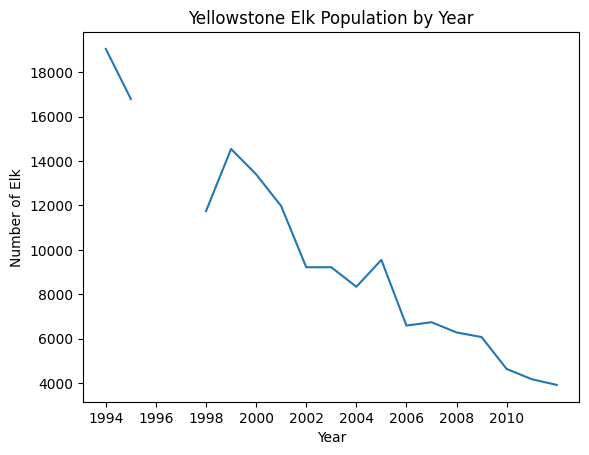

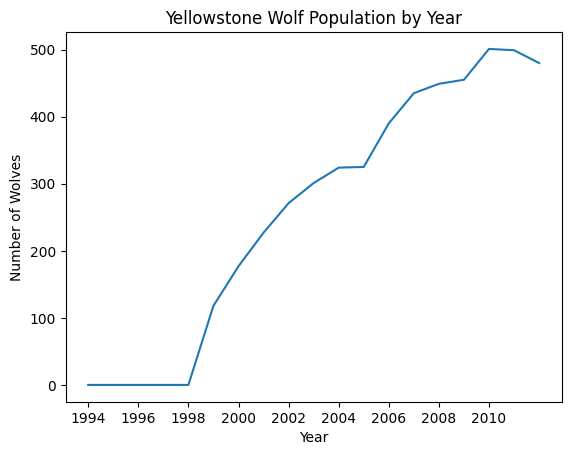

In [ ]:
graph_data_2()

#### **Question 4:**
Does it seem like there is a carrying capacity in Yellowstone? Why or why not?

#### **Question 5:**
Supposing that there is a carrying capacity in Yellowstone, what events would impact this capacity?

#### **Question 6:**
Does the growth rate of Yellowstone wolves align better with logarithmic or exponential growth? Why?

Please input your full answer (2+ sentances) within the quotes of the variables below.

In [ ]:
my_answer_4 = "Replace this with your answer"
my_answer_5 = "Replace this with your answer"
my_answer_6 = "Replace this with your answer"

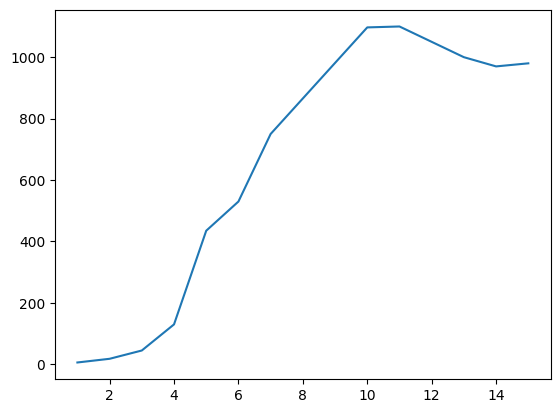

In [ ]:
x = [6, 18, 45, 130, 435, 530, 750, 1097, 1100, 1050, 1000, 970, 980]
y = [1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15]

plt.plot( y, x)
plt.show()

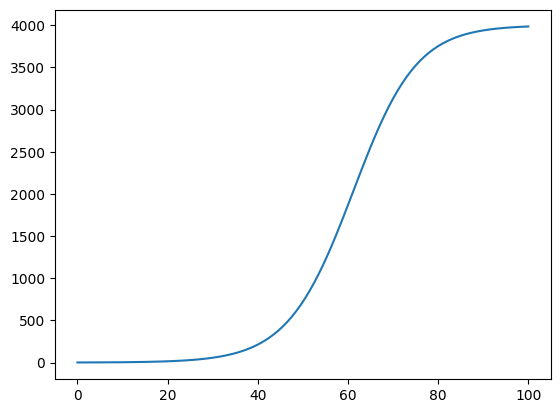

In [ ]:
indices = np.linspace(0, 100, num = 201)
growth_rate = .07
K = 4000
N = 1
y = [N]
for i in indices[1:]:
  deriv = growth_rate * ((K - y[-1])/K) * y[-1]
  y.append(y[-1] + deriv)

plt.plot(indices, y)
plt.show()


In [ ]:
c = [14, 15, 16, 17, 18, 19, 20]
x = [(2 ** (i %14)) * 8.2  for i in c]

for i in range(1, len(x)):
  x[i] += x[i - 1]

print(x)

[8.2, 24.599999999999998, 57.39999999999999, 122.99999999999999, 254.2, 516.5999999999999, 1041.3999999999999]
